In [1]:
import sys
sys.path.insert(0, '..')
from helpers.timing import timed, compare

import numpy as np
import random
from matplotlib import pyplot as plt

# Наибольший общий делитель
Наибольшим общим делителем (НОД) неотрицательных целых чисел $a$ и $b$ называется наибольшее целое $d$, которое делит и $a$, и $b$.
## Объявление функций
- Наивный способ. Решаем в лоб перебором всех чисел. На больших числах компьютер умирает.
- Алгоритм Евклида. С использованием леммы об остатке. Пусть $a ≥ b > 0$ и $r$  остаток от деления $a$ на $b$. Тогда $НОД(a, b) = НОД(r , b)$.

In [2]:
def get_naive_gcd(a, b):
    assert a >= 0 and b >= 0
    for d in reversed(range(max(a, b) + 1)):
        if d == 0 or a % d == b % d == 0:
            return d

In [3]:
def get_eucl_iter_gcd(a, b):
    while a and b:
        if a >= b:
            a %= b
        else:
            b %= a
    return max(a, b)       

In [4]:
def get_eucl_recurs_gcd(a, b):
    assert a >= 0 and b >= 0
    if a == 0 or b == 0:
        return max(a, b)
    elif a >= b:
        return get_eucl_recurs_gcd(a % b, b)
    else:
        return get_eucl_recurs_gcd(b % a, a)

In [5]:
def get_eucl_recurs_gcd_v2(a, b):
    assert a >= 0 and b >= 0
    if a == 0 or b == 0:
        return max(a, b)
    return get_eucl_recurs_gcd_v2(b % a, a)

In [6]:
gcd_methods = {
    'naive': get_naive_gcd,
    'eucl_iter': get_eucl_iter_gcd,
    'eucl_recurs': get_eucl_recurs_gcd,
    'eucl_recurs_v2': get_eucl_recurs_gcd_v2
}
def get_gcd(a, b, method):
    return gcd_methods[method](a, b)

## Проверка значений

In [7]:
def test(gcd, n_iter):
    for i in range(n_iter):
        c = random.randint(1, 1024)
        a = c * random.randint(1, 128)
        b = c * random.randint(1, 128)
        assert gcd(a, a) == gcd(a, 0) == a
        assert gcd(b, b) == gcd(b, 0) == b
        assert gcd(a, 1) == gcd(a, 1) == 1
        d = gcd(a, b)
        assert a % d == b % d == 0

In [8]:
n = 500
for method in gcd_methods:
    try:
        test(gcd_methods[method], n)
    except:
        print(f'{method} отработал с ошибками') 
    else:
        print(f'{method} отработал без ошибок') 

naive отработал без ошибок
eucl_iter отработал без ошибок
eucl_recurs отработал без ошибок
eucl_recurs_v2 отработал без ошибок


## Замеры быстродействия

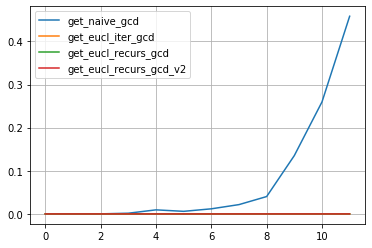

In [9]:
ar = np.array([[13, 3], [66, 8], [123, 12], [1253, 12], [5789, 15], [6257, 123], [12466, 254],
               [25468, 456], [45668, 488], [156168, 545], [256879, 879], [458796, 4568]])
compare(gcd_methods.values(), ar, unpack_array=True)

Наивный алгоритм бьёт рекорды быстродействия: на графике виден его экспоненциальный рост